Video from DataQuest about PCA analysis:

https://www.youtube.com/watch?v=Lsue2gEM9D0&feature=youtu.be

~Bam~

In [16]:
#importing libraries
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

np.set_printoptions(threshold=100)

In [17]:
#creating the dataframe we are going to use for the PCA analysis
#genes will be our indexes, wt1, wt2..., ko1, ko2... will be our columns
genes = ['gene' + str(i) for i in range (1,101)]

wt = ['wt' + str(i) for i in range(1,6)] #wt == wild type
ko = ['ko' + str(i) for i in range(1,6)] #ko == knock out

#by using * before the columns names, it makes the data frame transforms each list element as a column
#if you don't use it, you end up with something like [[wt1, wt2...],[ko1, ko2...]]:
#   	wt1	wt2	wt3	wt4	wt5
#       ko1	ko2	ko3	ko4	ko5
# gene1	NaN	NaN	NaN	NaN	NaN
# gene2	NaN	NaN	NaN	NaN	NaN
# gene3	NaN	NaN	NaN	NaN	NaN
# gene4	NaN	NaN	NaN	NaN	NaN
# gene5	NaN	NaN	NaN	NaN	NaN

data = pd.DataFrame(columns = [*wt, *ko], index = genes) 
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for gene in data.index:
    #creating random values for each index of our columns wt,ko using a poisson distribution
    #with means of the distribution ranging from 10 to 1000
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,950,1042,963,974,940,627,608,605,602,619
gene2,387,417,412,392,403,708,694,697,654,624
gene3,618,570,565,571,594,166,145,137,129,141
gene4,892,909,888,916,983,957,886,891,912,922
gene5,238,224,216,195,214,128,116,117,127,128


In [19]:
#checking the shape of our datafram (100 rows and 10 columns)
data.shape

(100, 10)

In [20]:
#in order to make a correct PCA analysis, we will normalize the data since the PCA algorithm uses distances
#based on the values of the elements to make its analysis. So, the unit will impact on the PCA choice

#we are also transposing our matrix before scaling it, because our samples are in our columns,
#and the scale atribute expects our samples to be in our rows
#why we put our samples in the columns instead of the rows?
#because genetic information usually is stored in this way
scaled_data = preprocessing.scale(data.T)
scaled_data

/Users/Guilherme/.virtualenvs/DH_3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


array([[ 0.85932053, -1.09489047,  1.15309434, ..., -1.01703955,
        -0.99438367, -1.01717327],
       [ 1.36287141, -0.87850896,  0.93552937, ..., -0.97474301,
        -1.03179464, -0.97998229],
       [ 0.93047445, -0.91457254,  0.91286635, ..., -0.88630479,
        -1.08417   , -1.05436425],
       ...,
       [-1.02899528,  1.14105187, -1.02708796, ...,  0.84016311,
         0.80134304,  1.2235832 ],
       [-1.04541542,  0.83090502, -1.06334879, ...,  1.04011039,
         0.94350474,  1.02833057],
       [-0.95236797,  0.61452351, -1.00895755, ...,  0.95551731,
         1.15300619,  0.7865892 ]])

In [21]:
#another option is using .StandardScaler().fit_transform, more usuall in machine learning
#when separating the training data from the test data
sc = preprocessing.StandardScaler()
scaled_data2 = sc.fit_transform(data.T)
scaled_data2

/Users/Guilherme/.virtualenvs/DH_3.6.8/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Guilherme/.virtualenvs/DH_3.6.8/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.85932053, -1.09489047,  1.15309434, ..., -1.01703955,
        -0.99438367, -1.01717327],
       [ 1.36287141, -0.87850896,  0.93552937, ..., -0.97474301,
        -1.03179464, -0.97998229],
       [ 0.93047445, -0.91457254,  0.91286635, ..., -0.88630479,
        -1.08417   , -1.05436425],
       ...,
       [-1.02899528,  1.14105187, -1.02708796, ...,  0.84016311,
         0.80134304,  1.2235832 ],
       [-1.04541542,  0.83090502, -1.06334879, ...,  1.04011039,
         0.94350474,  1.02833057],
       [-0.95236797,  0.61452351, -1.00895755, ...,  0.95551731,
         1.15300619,  0.7865892 ]])

<function matplotlib.pyplot.show(*args, **kw)>

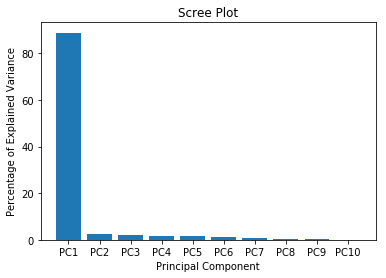

In [22]:
#now, let's create a PCA() object so we can "train" it
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

#with our fited data, now let's check each variance of our principal components
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(i) for i in range(1, len(per_var) + 1)]

#creating a bar plot to see each PC variance graphically
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show

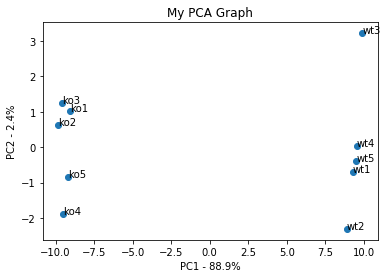

In [23]:
#in order to create a PCA plot, we will first put the new coordinates created by pca.fit(scaled_data)
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)

#creating scatter plot
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))


In [24]:
#creating scores to see which gene was responsible for the separation of the two clusters in the x axis
loading_scores = pd.Series(pca.components_[0], index = genes)

#sorting the scores based on their absolute values
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

#getting the name of the top 10 indexes
top_10_genes = sorted_loading_scores[:10].index.values
print(loading_scores[top_10_genes])

gene24    0.105962
gene75   -0.105933
gene56   -0.105912
gene58    0.105912
gene71   -0.105886
gene91   -0.105858
gene66   -0.105856
gene57   -0.105838
gene97   -0.105826
gene55    0.105823
dtype: float64
